# **Impute Missing Values**


## Objectives
-   Identify missing values in the dataset.
-   Apply techniques to impute missing values in the dataset.
-   Use suitable techniques to normalize data in the dataset.



-----


#### Install needed library


In [24]:
#!pip install pandas

### Step 1: Import Required Libraries


In [25]:
import pandas as pd

### Step 2: Load the Dataset Into a Dataframe


#### **Read Data**
<p>
The functions below will download the dataset into your browser:
</p>


In [26]:
#file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
file_path = "survey_data.csv"
df = pd.read_csv(file_path)

# Display the first few rows to ensure it loaded correctly
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Step 3. Finding and Removing Duplicates
##### Task 1: Identify duplicate rows in the dataset.


In [27]:
df.duplicated().sum()

0

##### Task 2: Remove the duplicate rows from the dataframe.



In [28]:
# No dupe

### Step 4: Finding Missing Values
##### Task 3: Find the missing values for all columns.


In [29]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df.isnull().sum())

ResponseId                            0
MainBranch                            0
Age                                   0
Employment                            0
RemoteWork                        10631
Check                                 0
CodingActivities                  10971
EdLevel                            4653
LearnCode                          4949
LearnCodeOnline                   16200
TechDoc                           24540
YearsCode                          5568
YearsCodePro                      13827
DevType                            5992
OrgSize                           17957
PurchaseInfluence                 18031
BuyNewTool                        20256
BuildvsBuy                        22079
TechEndorse                       21769
Country                            6507
Currency                          18753
CompTotal                         31697
LanguageHaveWorkedWith             5692
LanguageWantToWorkWith             9685
LanguageAdmired                   14565


##### Task 4: Find out how many rows are missing in the column RemoteWork.


In [30]:
df['RemoteWork'].isna().sum()

10631

### Step 5. Imputing Missing Values
##### Task 5: Find the value counts for the column RemoteWork.


In [31]:
df['RemoteWork'].value_counts()

RemoteWork
Hybrid (some remote, some in-person)    23015
Remote                                  20831
In-person                               10960
Name: count, dtype: int64

##### Task 6: Identify the most frequent (majority) value in the RemoteWork column.



In [32]:
df['RemoteWork'].mode()

0    Hybrid (some remote, some in-person)
Name: RemoteWork, dtype: object

##### Task 7: Impute (replace) all the empty rows in the column RemoteWork with the majority value.



In [33]:
freq = df['RemoteWork'].mode()[0]
df['RemoteWork'].fillna(freq, inplace=True)

C:\Users\alvia\AppData\Local\Temp\ipykernel_27972\1160866896.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['RemoteWork'].fillna(freq, inplace=True)


In [34]:
df['RemoteWork'].isna().sum()

0

##### Task 8: Check for any compensation-related columns and describe their distribution.

In [36]:
comp_cols = [col for col in df.columns if 'comp' in col.lower() or 'salary' in col.lower()]
print("Compensation-related columns:", comp_cols)


Compensation-related columns: ['CompTotal', 'AIComplex', 'ConvertedCompYearly']


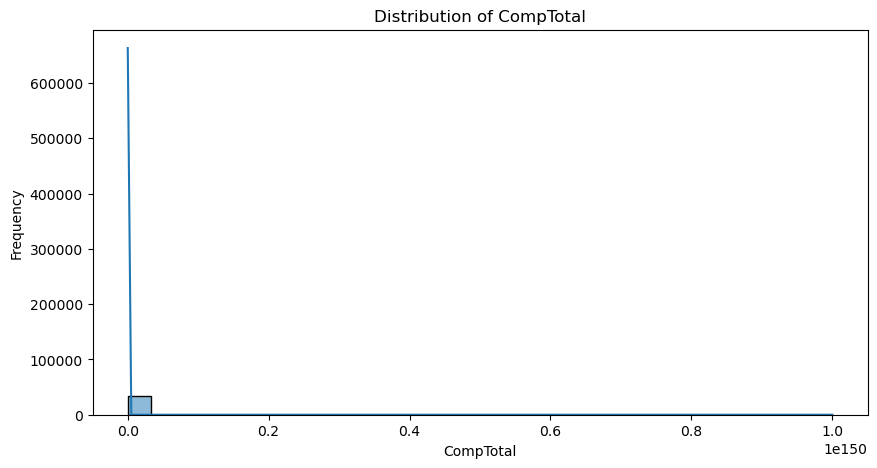

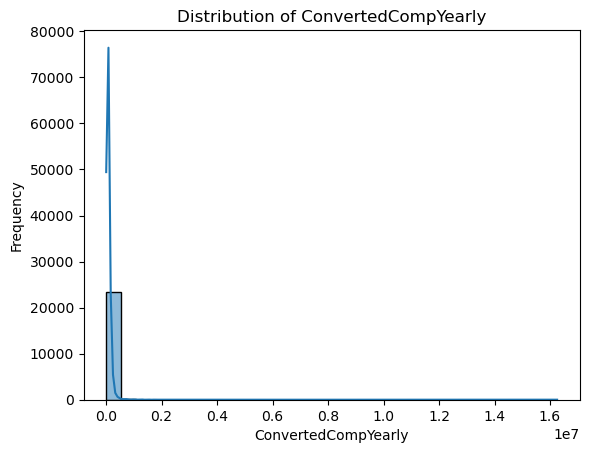

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

for col in comp_cols:
    if df[col].dtype in ['int64', 'float64']:  # Only plot numerical columns
        sns.histplot(df[col], kde=True, bins=30)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()


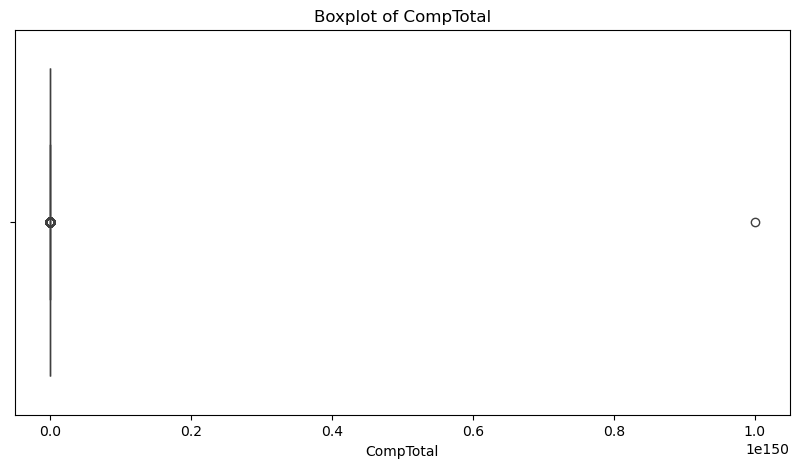

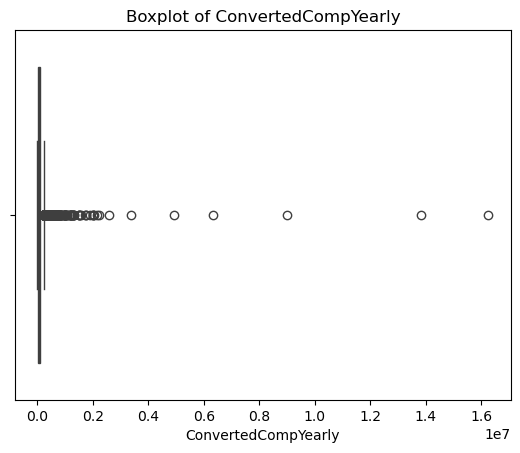

In [38]:
plt.figure(figsize=(10, 5))

for col in comp_cols:
    if df[col].dtype in ['int64', 'float64']:
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot of {col}')
        plt.show()

Copyright © IBM Corporation. All rights reserved.
